# Exercise 7 - Data Manipulation with Pandas

Load in the dataset `renfe_trains_cleaned.csv`

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/renfe_trains_cleaned.csv')

### Pivot Tables

Use a pivot table to explore how `price` differs with respect to the type of `fare` for each `destination`

In [2]:
df.pivot_table(values=['price'],
              index='fare',
              columns='destination').round()

price                   
destination             BARCELONA PONFERRADA SEVILLA
fare                                                
Adulto ida                   45.0        NaN    51.0
Básica                       46.0        NaN     NaN
COD.PROMOCIONAL              68.0        NaN     NaN
Doble Familiar-Flexible       NaN       85.0     NaN
Flexible                    113.0       56.0    76.0
Individual-Flexible           NaN       98.0     NaN
Mesa                        200.0        NaN     NaN
Promo                        79.0       35.0    55.0
Promo +                      79.0       41.0    50.0
YOVOY                        64.0       33.0    49.0

### Working with Time Series

Convert `departure` & `arrival` to a more appropriate datatype

In [3]:
df[['departure', 'arrival']] = df[['departure', 'arrival']].apply(lambda time: pd.to_datetime(time, format='%Y-%m-%d %H:%M:%S'))

Calculate the duration of each train journey and add it as a column called `duration`

In [4]:
df['duration'] = df['arrival'] - df['departure']

Make `departure` the index of the DataFrame

In [5]:
df.set_index('departure', inplace=True)

Sort the index low to high (earlier to later). This will make slicing possible later.

In [6]:
df.sort_index(inplace=True)

Select all journeys which `departed`on `07/05/19`

In [7]:
df.loc['2019-05', :]

,company,origin,destination,arrival,vehicle_class,price,fare,price_bin,duration
departure,,,,,,,,,
2019-05-01 06:30:00,RENFE,MADRID,BARCELONA,2019-05-01 09:20:00,Turista,107.7000,Flexible,"(0, 150]",0 days 02:50:00
2019-05-01 07:00:00,RENFE,MADRID,SEVILLA,2019-05-01 09:55:00,Turista,62.2000,Flexible,"(0, 150]",0 days 02:55:00
2019-05-01 07:00:00,RENFE,MADRID,SEVILLA,2019-05-01 09:55:00,Turista,71.4938,Flexible,"(0, 150]",0 days 02:55:00
2019-05-01 07:00:00,RENFE,MADRID,BARCELONA,2019-05-01 09:30:00,Turista,100.4000,Promo,"(0, 150]",0 days 02:30:00
2019-05-01 07:00:00,RENFE,MADRID,SEVILLA,2019-05-01 09:55:00,Turista Plus,71.4938,Flexible,"(0, 150]",0 days 02:55:00
...,...,...,...,...,...,...,...,...,...
2019-05-31 21:25:00,RENFE,MADRID,SEVILLA,2019-06-01 00:10:00,Turista Plus,58.9500,Promo,"(0, 150]",0 days 02:45:00
2019-05-31 21:25:00,RENFE,MADRID,SEVILLA,2019-06-01 00:10:00,Turista,62.2000,Flexible,"(0, 150]",0 days 02:45:00
2019-05-31 21:25:00,RENFE,MADRID,BARCELONA,2019-05-31 23:55:00,Turista,75.4000,Promo,"(0, 150]",0 days 02:30:00


Select all journeys which `departed` on `07/05/19` to `11/05/19`

In [8]:
df.loc['2019-05-07':'2019-05-11', :]

,company,origin,destination,arrival,vehicle_class,price,fare,price_bin,duration
departure,,,,,,,,,
2019-05-07 06:10:00,RENFE,MADRID,BARCELONA,2019-05-07 08:40:00,Turista Plus,49.1500,Promo,"(0, 150]",0 days 02:30:00
2019-05-07 06:10:00,RENFE,MADRID,BARCELONA,2019-05-07 08:40:00,Turista,58.1500,Promo,"(0, 150]",0 days 02:30:00
2019-05-07 06:10:00,RENFE,MADRID,BARCELONA,2019-05-07 08:40:00,Turista Plus,80.1500,Promo,"(0, 150]",0 days 02:30:00
2019-05-07 06:20:00,RENFE,MADRID,SEVILLA,2019-05-07 09:16:00,Turista,43.5500,Promo,"(0, 150]",0 days 02:56:00
2019-05-07 06:20:00,RENFE,MADRID,BARCELONA,2019-05-07 14:25:00,Turista,71.4938,Promo,"(0, 150]",0 days 08:05:00
...,...,...,...,...,...,...,...,...,...
2019-05-11 20:35:00,RENFE,MADRID,SEVILLA,2019-05-11 23:15:00,Turista,53.4000,Promo,"(0, 150]",0 days 02:40:00
2019-05-11 21:25:00,RENFE,MADRID,SEVILLA,2019-05-12 00:10:00,Turista,62.2000,Flexible,"(0, 150]",0 days 02:45:00
2019-05-11 21:25:00,RENFE,MADRID,SEVILLA,2019-05-12 00:10:00,Turista Plus,58.9500,Promo,"(0, 150]",0 days 02:45:00


Add one year to each date in the index of the DataFrame (but do not save it!)

In [9]:
df.index + pd.tseries.offsets.Day(365)

DatetimeIndex(['2020-04-11 07:15:00', '2020-04-11 09:00:00',
               '2020-04-11 11:05:00', '2020-04-11 12:00:00',
               '2020-04-11 12:30:00', '2020-04-11 14:30:00',
               '2020-04-11 16:30:00', '2020-04-11 18:00:00',
               '2020-04-11 19:30:00', '2020-04-11 20:00:00',
               ...
               '2021-12-01 17:30:00', '2021-12-02 07:15:00',
               '2021-12-02 10:18:00', '2021-12-02 12:30:00',
               '2021-12-02 14:30:00', '2021-12-02 16:00:00',
               '2021-12-03 09:30:00', '2021-12-03 18:30:00',
               '2021-12-03 20:30:00', '2021-12-04 06:30:00'],
              dtype='datetime64[ns]', name='departure', length=29724, freq=None)

Create a subset of the DataFrame called madrid_to_barca which contains only journeys with `origin` as `MADRID` and `destination` as `BARCELONA`

In [10]:
madrid_to_barca = df[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')]

Select only those tickets in `madrid_to_barca` which are in the `Promo` category for `fare` and `Turista` for `vehicle_class` and update `madrid_to_barca` to only contain those

In [11]:
madrid_to_barca = df[(df['fare'] == 'Promo') & (df['vehicle_class'] == 'Turista')]

Compute a 7 day rolling average for `price` for the `madrid_to_barca` DataFrame. Add it as a column called `rolling`.

In [12]:
madrid_to_barca['rolling'] = madrid_to_barca['price'].rolling(window='7D').mean().round(2)

C:\Users\Thomas Holmes\AppData\Local\Temp\ipykernel_24788\221241999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_to_barca['rolling'] = madrid_to_barca['price'].rolling(window='7D').mean().round(2)


Plot the rolling average vs. the actual values of `price`

<Axes: xlabel='departure'>

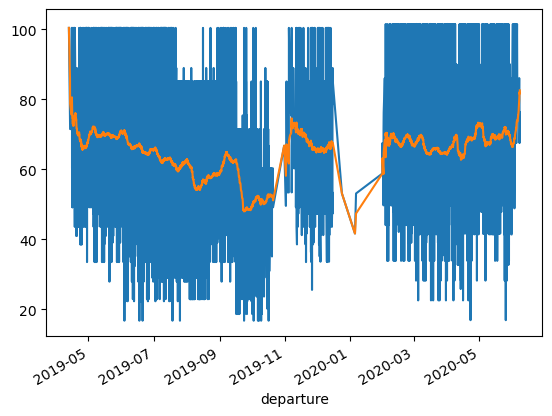

In [13]:
madrid_to_barca['price'].plot(kind='line')
madrid_to_barca['rolling'].plot(kind='line')

### Combining Tables

Read in the `fare_conditions.csv` file. It contains the conditions for the type of ticket that has been purchased.

In [14]:
conditions = pd.read_csv('data/fare_conditions.csv')

Add the fare conditions to the original `df` DataFrame

In [15]:
df.merge(conditions, on='fare')

,company,origin,destination,arrival,vehicle_class,price,fare,price_bin,duration,Conditions
0,RENFE,MADRID,BARCELONA,2019-04-12 16:37:00,Turista,43.2500,Adulto ida,"(0, 150]",0 days 09:22:00,Valid for 1 adult to return within 1 day
1,RENFE,MADRID,BARCELONA,2019-04-15 16:37:00,Turista,43.2500,Adulto ida,"(0, 150]",0 days 09:22:00,Valid for 1 adult to return within 1 day
2,RENFE,MADRID,BARCELONA,2019-04-16 16:37:00,Turista,71.4938,Adulto ida,"(0, 150]",0 days 09:22:00,Valid for 1 adult to return within 1 day
3,RENFE,MADRID,BARCELONA,2019-04-16 16:37:00,Turista,43.2500,Adulto ida,"(0, 150]",0 days 09:22:00,Valid for 1 adult to return within 1 day
4,RENFE,MADRID,BARCELONA,2019-04-17 16:37:00,Turista,43.2500,Adulto ida,"(0, 150]",0 days 09:22:00,Valid for 1 adult to return within 1 day
...,...,...,...,...,...,...,...,...,...,...
29719,RENFE,MADRID,SEVILLA,2020-09-28 18:30:00,Turista,51.6500,YOVOY,"(0, 150]",0 days 02:30:00,Under 25 railcard required
29720,RENFE,MADRID,SEVILLA,2020-09-28 21:38:00,Turista,51.6500,YOVOY,"(0, 150]",0 days 02:38:00,Under 25 railcard required
29721,RENFE,MADRID,SEVILLA,2020-09-29 11:38:00,Turista,51.6500,YOVOY,"(0, 150]",0 days 02:38:00,Under 25 railcard required
29722,RENFE,MADRID,SEVILLA,2020-09-29 14:32:00,Turista,51.6500,YOVOY,"(0, 150]",0 days 02:32:00,Under 25 railcard required
